In [1]:
from tensorflow import keras

In [2]:
model = keras.models.load_model("../Data/best_cnn_model.keras")

In [3]:
# model의 layer확인
model.layers

[<Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten_2, built=True>,
 <Dense name=dense_4, built=True>,
 <Dropout name=dropout_2, built=True>,
 <Dense name=dense_5, built=True>]

In [6]:
# kernel size(3,3)으로 구성된 이미지 보기
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [7]:
# 가중치 보기
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.01474082 0.24960944


In [9]:
import matplotlib.pyplot as plt

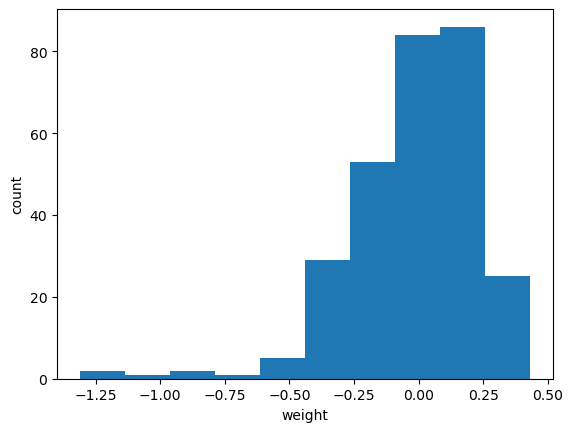

In [10]:
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

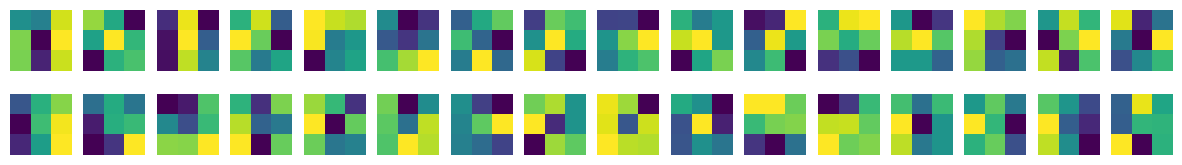

In [11]:
# 이미지로 확인하기
fig, axs = plt.subplots(2,16,figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j])
        axs[i,j].axis('off')

plt.show()        

In [12]:
# 특성맵 시각화
model.layers[0].input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer_1>

In [13]:
(train_input,train_target), (test_input, test_target) = \
                        keras.datasets.fashion_mnist.load_data()

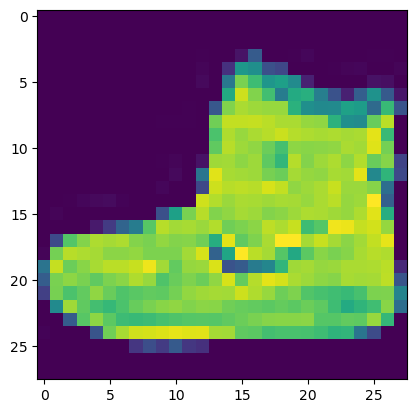

In [16]:
plt.imshow(train_input[0])
plt.show()

In [ ]:
# model 불러오기
conv_acti = keras.models.Model(
    model.layers[0].input,
    model.layers[0].output
)

In [20]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_map = conv_acti.predict(inputs)
print(feature_map.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
(1, 28, 28, 32)


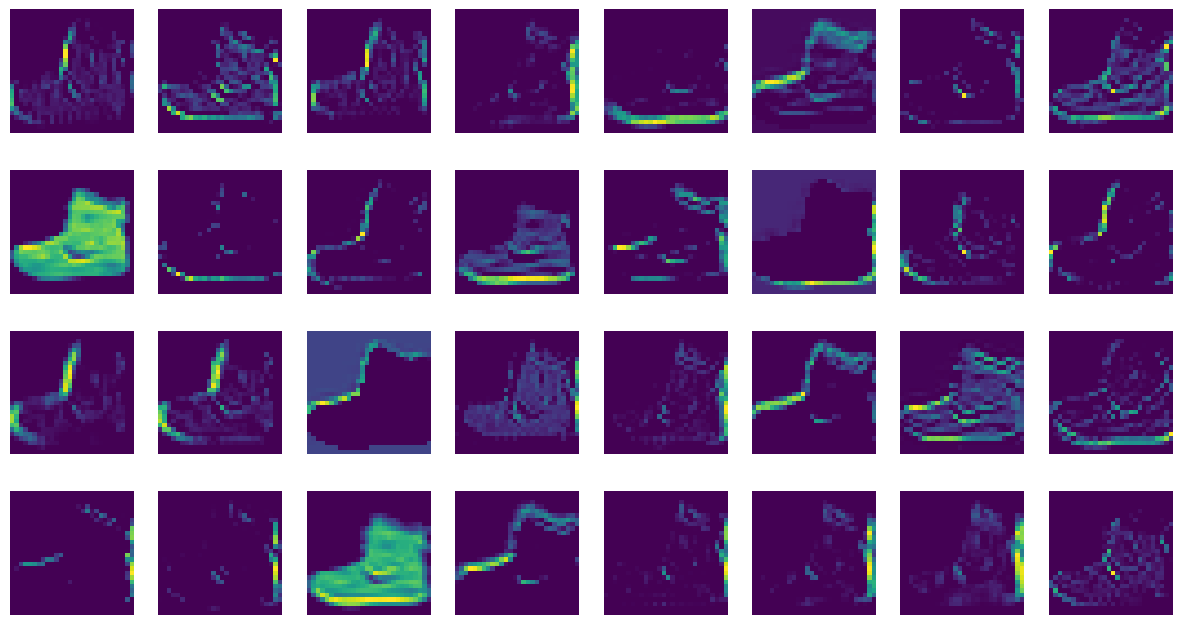

In [23]:
fig, axs = plt.subplots(4,8,figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_map[0,:,:,i*8+j])
        axs[i,j].axis('off')

plt.show()

In [25]:
# Max Pooling
conv2_acti = keras.models.Model(model.layers[0].input, model.layers[2].output)

In [28]:
inputs

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

In [26]:
feature_map =  conv2_acti.predict(inputs)
print(feature_map.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
(1, 14, 14, 64)


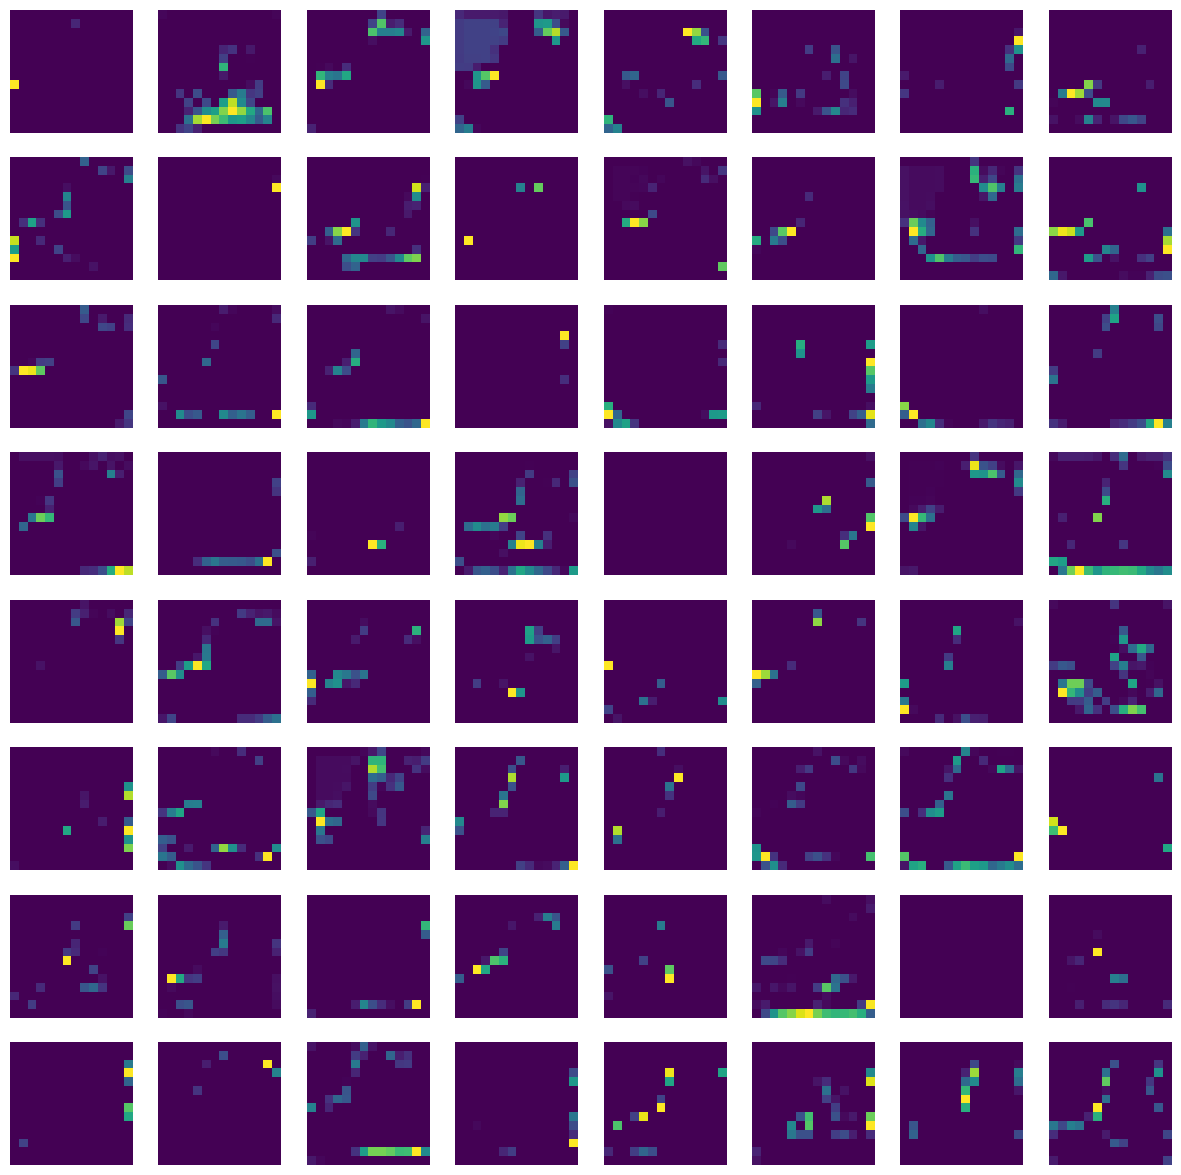

In [27]:
fig, axs = plt.subplots(8,8,figsize=(15,15))

for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_map[0,:,:,i*8+j])
        axs[i,j].axis('off')

plt.show()